<h1>Linear Regression</h1>

In [274]:
#General Libraries required for linear & logistic regression.
import pandas as pd
import numpy as np
import linear_models as lm #Our custom Implementation of Linear Regression
import matplotlib.pyplot as plt

#Specific for Linear Regression Dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [275]:
data = fetch_california_housing()
X = data.data
y = data.target

In [276]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [277]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [278]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = lm.LinearRegression(
    iterations=30000, 
    learning_rate=0.01, 
    dim=X_train.shape[1], 
    reg_var=0.1, 
    epsilon=1e-8
)

In [280]:
cost_history_lg = model.fit(X_train, y_train, normalize=True)

print("Weights:", model.w)
print("Bias:", model.b)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error on Test Set: {mse}")

Iteration 0: Cost = 2.7649865665189943
Iteration 100: Cost = 0.6452974003771038
Iteration 200: Cost = 0.3551161671535587
Iteration 300: Cost = 0.30936795275017176
Iteration 400: Cost = 0.2976255349233964
Iteration 500: Cost = 0.2913759981042677
Iteration 600: Cost = 0.28658652929110534
Iteration 700: Cost = 0.2825853837879368
Iteration 800: Cost = 0.2791873305370811
Iteration 900: Cost = 0.2762914347084965
Iteration 1000: Cost = 0.27382083962237247
Iteration 1100: Cost = 0.2717118043062841
Iteration 1200: Cost = 0.2699104767601351
Iteration 1300: Cost = 0.26837116129315003
Iteration 1400: Cost = 0.2670550349433844
Iteration 1500: Cost = 0.265929097438012
Iteration 1600: Cost = 0.26496528931863295
Iteration 1700: Cost = 0.2641397459467898
Iteration 1800: Cost = 0.26343216510917694
Iteration 1900: Cost = 0.26282527054825194
Iteration 2000: Cost = 0.26230435673929375
Iteration 2100: Cost = 0.26185690254774974
Iteration 2200: Cost = 0.26147224330296864
Iteration 2300: Cost = 0.261141292421

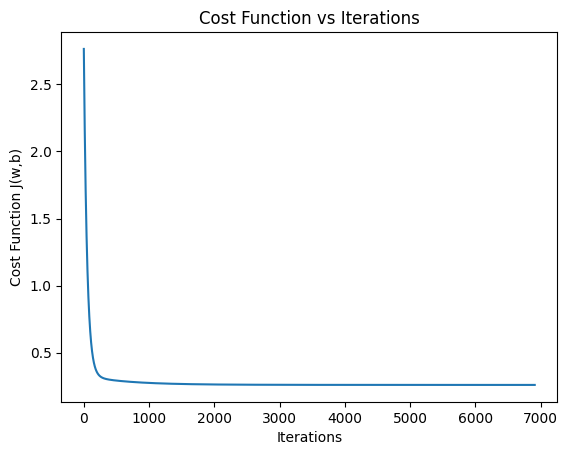

In [281]:
plt.plot(cost_history_lg)

plt.title("Cost Function vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost Function J(w,b)")

plt.show()

<h1>Logistic Regression<h1>

In [282]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [283]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [284]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [285]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [287]:
# Define the logistic regression model
logistic_model = lm.LogisticRegression(
    iterations=30000, 
    learning_rate=0.01, 
    dim=X_train.shape[1], 
    reg_var=0.1, 
    epsilon=1e-8, 
    threshold=0.5
)

# Fit the model on the training data with normalization
cost_history_logistic = logistic_model.fit(X_train, y_train, normalize=True)

# Print the learned weights and bias
print("Logistic Regression Weights:", logistic_model.w)
print("Logistic Regression Bias:", logistic_model.b)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

Iteration 0: Cost 0.6739897532836504
Iteration 100: Cost 0.25495617762986306
Iteration 200: Cost 0.19421208439233917
Iteration 300: Cost 0.16659753625953247
Iteration 400: Cost 0.1501586875841275
Iteration 500: Cost 0.13900252963669701
Iteration 600: Cost 0.13080608884258324
Iteration 700: Cost 0.12445646707363685
Iteration 800: Cost 0.11934897965320337
Iteration 900: Cost 0.11512416454044398
Iteration 1000: Cost 0.11155338223833636
Iteration 1100: Cost 0.10848334740869639
Iteration 1200: Cost 0.10580688987975204
Iteration 1300: Cost 0.10344647986159089
Iteration 1400: Cost 0.10134442551579984
Iteration 1500: Cost 0.09945676976738027
Iteration 1600: Cost 0.09774934168042516
Iteration 1700: Cost 0.09619511650653972
Iteration 1800: Cost 0.09477239988445235
Iteration 1900: Cost 0.09346354765082919
Iteration 2000: Cost 0.09225404348668816
Iteration 2100: Cost 0.0911318215322389
Iteration 2200: Cost 0.09008676037729729
Iteration 2300: Cost 0.08911029928640998
Iteration 2400: Cost 0.08819514

In [288]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9824561403508771
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



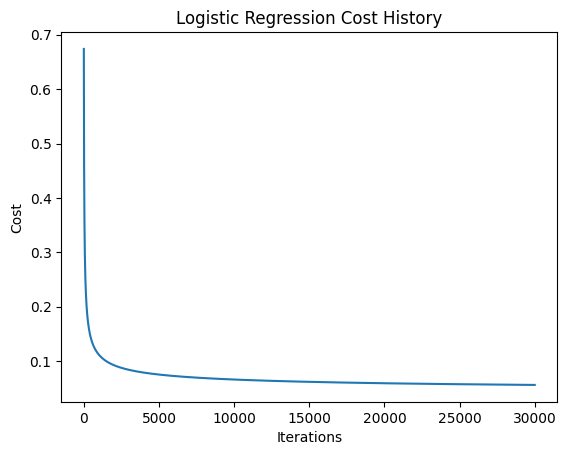

In [289]:
plt.plot(cost_history_logistic)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Logistic Regression Cost History")
plt.show()